In this notebook, I am going to introduce the reader to the essential of linear algebra needed for machine learning. There is a whole bunch of advanced maths that need to be mastered to really understand the deep core of machine learning, however to get started all you need is basics of  linear algebra, calculus,and intermediate-level Python. So this notebook is concerned with linear alagebra in Python
## Basics linear algebra with Numpy
Linear algebra is very important in machine learning. Here we will introduce the reader to how to perferm basics linear algebra operations with the python Numpy library. We will talk about:
1. Vectors,
2. Matrices
3. Tensors.

In [5]:
import matplotlib.pyplot as plt
import numpy as np # There is nothing special about importing it as np, that is what most people do
import numpy.linalg as linalg
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Vectors
Vectors are ubiquitous in machine learning. In generally speaking, vectors can be defined as any class that can be added together and multiplied by scalars to produce another object of the same kind. If two obkwcts $a$ and $b$ are vectors, they must satisfy the following: 
1. $a$ + $b$ = $c$ 
2. $ \lambda *a = d $

With $c$, $d$ another two vectors and $\lambda$ a scalar. Mathematically speaking, any object that satisfy the two properties are vectors. Vectors live in a vector space and $\lambda$ are the field over which the vector space is defined. Vectors spaces can be defined over the complex field $\mathbb{C}$ in which case $\lambda$ is a complex number. They could also be defined over the real field $\mathbb{R}$ in which case $\lambda$ is a real number or over any purely abstract defined field you could think of. However, in machine learning, the vectors are real objects i.e their entries are real numbers and the vector space is fundamental defined over $\mathbb{R}$.

> Create a vector and visualize it in Python

Here let us look at how to define vector in the numpy library in Python and then do some basic operations on them. Let us defined a vector $a=\begin{pmatrix}1\\ 2\end{pmatrix}$ and a vector $b=\begin{pmatrix}2\\ -1\end{pmatrix}$

In [3]:
a = np.array([1, 2]) # by default numpy create a row vector
b= np.array([2, -1])
a.reshape(-1,1) # need to reshape to see it display as a column vector. I will come back to reshape later on.

array([[1],
       [2]])

One could get a columns vector straight by doing the following:

In [3]:
T= np.array([[1], [2]])
T

array([[1],
       [2]])

## `Visualize vectors`

In the next cell, I create now a plot to visualize this two dimensional vector that I created.

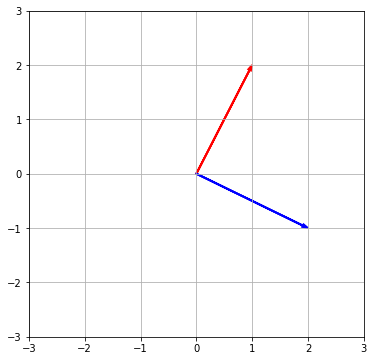

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid()
ax.arrow(0, 0, a[0], a[1], head_width=0.05, head_length=0.1, 
length_includes_head=True, linewidth=2, color='r');
ax.arrow(0, 0, b[0], b[1], head_width=0.05, head_length=0.1, 
length_includes_head=True, linewidth=2, color='b');

## `Addition, multiplying by scalar and transpose of a vector`

In [56]:
c= a+b # c is the sum of the vector a and the vector b
d=2*a # d is two times the vector a
e=3*a-5*b # e is a linear combinaison of a and b
f=a.T    # f is the transpose of a

In [57]:
f

array([1, 2])

**Important note:** Of course you can do any arithmetic operations such as (`+`, `-`, `*`, `/`, `//`, `**`, etc.) on vectors in numpy but remember that the operations are done elements wise.

## `Dot product of two vectors`

The product of a row vector with a column vector is a scalar, which we call the dot product. In `numpy`, you can use the `.dot` method of an array, or the symbol `@` to calculate the dot product.

In [59]:
a@e # a.dot(e) could have give the same result.

15

The dot product allows us to talk about angle between the vectors, orthogonality of vectors, distance between vectors and overlap between vectors. "Distance" and "Angle" are useful beyond their usual interpretation. They are used as a measure of __similarity__ between vectors.

In [63]:
a*b # does multiplication components wise

array([ 2, -2])

## `Some special vectors in numpy`


In [67]:
one= np.ones(5) # np.ones(n) creates n dimentional vector with only 1 everywhere.
one

array([1., 1., 1., 1., 1.])

In [68]:
zero= np.zeros(5) #np.zero(n) creates n dimentional vector with only 0 everywhere
zero

array([0., 0., 0., 0., 0.])

In [7]:
empt=np.empty(3) # not to confuse with np.zeros. It returns an unintialized array. Its output is unpredictable
empt

array([0.75, 0.75, 0.  ])

In [8]:
arange=np.arange(1,5) # This is similar to the python in built function range
arange

array([1, 2, 3, 4])

In [10]:
arange_step=np.arange(1,10,2) # I specify the step that is two in this case.
arange_step

array([1, 3, 5, 7, 9])

In [12]:
arange_fl=np.arange(1.5,4.5) # np.arange also works with float.
arange_fl

array([1.5, 2.5, 3.5])

In [13]:
lins=np.linspace(1,7/3,5) # return n evenly distributed points between two values. Here we have generated five points.
lins

array([1.   , 1.333, 1.667, 2.   , 2.333])

Can you think about the difference betwen `np.linspace` and `np.arange`?

In [23]:
rand=np.random.rand(3) # generating three random numbers uniformily distributed between 0 and 1.
rand

array([0.728, 0.021, 0.471])

In [22]:
rand_n=np.random.randn(3) # generating three random numbers normally distributed.
rand_n

array([ 0.338, -1.056, -2.367])

## `Norm of  vectors`

Dot product between vectors induces the notion of norm. There are many types of norm but the $l_2$-norm, the $l_0$- and $l_1$-norms are frequently used in machine learning. These norms are defined as follows:
1. $l_2 (x) = \left( \sum x_{i}^{2} \right )^{1/2}$ . It is bssically the Frobenius norm,

2. $l_1 (x) = \sum  |x_{i}|$ where $ x_i$ are the component of the vector,

3. $l_0$ counts the number of nonzero element of the vector.

It is worth saying that the norm $l_0$ is very useful in some case. For instance, by imposing a regularizer on a neural network that adds a penalty in the $l_0$-norm of the weights, we increase sparsity in the network by forcing many entries to zero.

In [73]:
np.linalg.norm(a, ord=0)

2.0

## Important notice on the dimension of a vector  and dimension of an array in numpy

The array `np.array([0,2,3])` is a vector in $R^3$, thus is a vector of dimension $3$. On the other hand, the array `np.array([0,2,3])` is a 1D array, that is a list of numbers. The array `np.array([[0,5],[4,4]])` is a 2D array in numpy, which is a rectangle of numbers. This is in fact a matrix.

## 2. Matrices

Like vectors, matrics form linear spaces. The matrices we encounter in machine learnig are real-valued, just like the vectors. It is fundamental to know matrices manipulation to embark in machine learning journey. In numpy matrices are considered as multi dimensional array.

In [25]:
A = np.array([[1, 2], [0, 4]]) # Python disposes the array along rows.
A

array([[1, 2],
       [0, 4]])

In [26]:
A.T # transpose of a matrix

array([[1, 0],
       [2, 4]])

In [31]:
B=np.array([[1.5,3],[2.5,4]])
B

array([[1.5, 3. ],
       [2.5, 4. ]])

## `Operation on matrices`
One can do any arithmetic operations such as (`+`, `-`, `*`, `/`, `//`, `**`, etc.) on matrices in numpy. The operations are done elements wise.

In [33]:
A*B # element wise multiplication

array([[ 1.5,  6. ],
       [ 0. , 16. ]])

In [34]:
A/B # does elementwise division

array([[0.667, 0.667],
       [0.   , 1.   ]])

In [35]:
A**B # elementwise exponentiation

array([[  1.,   8.],
       [  0., 256.]])

In [36]:
A**2 # raise each element to the power 2

array([[ 1,  4],
       [ 0, 16]], dtype=int32)

In [37]:
A^2 # square of the matrix

array([[3, 0],
       [2, 6]], dtype=int32)

In [38]:
A@B # matrice multiplication

array([[ 6.5, 11. ],
       [10. , 16. ]])

## `Creating matrices with reshape`

In [45]:
mat_resh=np.arange(50).reshape(5,10)
mat_resh

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [48]:
mat_resh1=np.arange(24).reshape(4,6)
mat_resh1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

One can also create special matrices with `np.zeros`, `np.eye`, `np.ones`. It will be good to try these and see how they work.

## `Matrices inversion`
The inversion of a square matrix $A$ is the matrix noted $A^{-1}$ such that $A A^{-1}= I$ where $I$ is the identity matrix of the same size as $A$. A fundamental condition for a matrix to be invertible is that its determinant be non zero. Matrices which determinant is zero are called singular matrices.

In [6]:
A_0 = np.array([[1,0,3],[5,7,1],[2,2,31]])
A_0

array([[ 1,  0,  3],
       [ 5,  7,  1],
       [ 2,  2, 31]])

In [8]:
linalg.det(A_0) # computing the determinant of A_0

202.99999999999997

In [7]:
linalg.inv(A_0) # computing the inverse of A_0

array([[ 1.059,  0.03 , -0.103],
       [-0.754,  0.123,  0.069],
       [-0.02 , -0.01 ,  0.034]])

## ` Moore–Penrose inverse`
Have a look at this wikipedia page [Penrose](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse) to learn more about the pseudo inverse of a matrix and why it is used in linear algebra.

In [10]:
B_0 = np.array([[1,0,3],[5,7,1]]) # notice that the matrix needs not to be a square matrix
linalg.pinv(B_0)

array([[ 0.051,  0.061],
       [-0.082,  0.102],
       [ 0.316, -0.02 ]])

## ` QR decomposition`
Learn more about it here [QR](https://en.wikipedia.org/wiki/QR_decomposition)

In [12]:
q, r = linalg.qr(A_0)
print(q)
print(r)

[[-0.183  0.857 -0.482]
 [-0.913 -0.33  -0.241]
 [-0.365  0.396  0.843]]
[[ -5.477  -7.12  -12.78 ]
 [  0.     -1.517  14.506]
 [  0.      0.     24.438]]


## ` Eigenvalue and eigenvectors of a matrix`

In [13]:
eigenval, eigenvect = linalg.eig(A_0)

In [14]:
eigenval

array([ 0.965,  6.714, 31.321])

In [15]:
eigenvect

array([[-0.771, -0.041,  0.098],
       [ 0.637,  0.996,  0.061],
       [ 0.009, -0.079,  0.993]])

## 3. Tensors
Tensors are generalization of vectors and matrices. They are multidimensional array. The so called `ndarray` in numpy. It takes some time to get used to tensors but they are very useful in machine learning. Scalars are zero order tensors, vectors are of first order and matrices are of third order. Of course there are higher order tensors.

A brief summary:<br><br>
<table style="width:100%">
  <tr>
    <td><b>Dimension</b></td>
    <td><b>Geometrical representation</b></td> 
    <td><b>Mathematical Object</b></td>
    <td><b>Example</b></td>
  </tr>
  
  <tr>
    <td>Zero </td>
    <td>Point</td> 
    <td>Scalar </td>
    <td>[ 1 ]</td>
  </tr>

  <tr>
    <td>One</td>
    <td>Line</td> 
    <td>Vector </td>
    <td>[ 1,2,3,4,... ]</td>
  </tr>
  
   <tr>
    <td>Two</td>
    <td>Surface</td> 
    <td>Matrix </td>
       <td>[ [1,2,3,4,...], [1,2,3,4,...], [1,2,3,4,...],... ]</td>
  </tr>
  
   <tr>
    <td>Three</td>
    <td>Volume</td> 
    <td>Cube of Numbers</td>
    <td>[ [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...] ,...]... ]</td>
  </tr>
  
</table>

In [2]:
# Creation of a tensor T
T_0 = np.array([
  [[1,0,3],    [4,5,6.5],    [7,8.5,9]],
  [[1.5,2,3], [4,1,6], [1.7,8,9]],
  [[21,2.5,23], [4,2,6], [7,2,2]],
  ])
print(T_0.shape)
print(T_0)

(3, 3, 3)
[[[ 1.   0.   3. ]
  [ 4.   5.   6.5]
  [ 7.   8.5  9. ]]

 [[ 1.5  2.   3. ]
  [ 4.   1.   6. ]
  [ 1.7  8.   9. ]]

 [[21.   2.5 23. ]
  [ 4.   2.   6. ]
  [ 7.   2.   2. ]]]


All the arithmetic operations such as addition, division, substraction... done on vectors and matrices can be done on tensors the same way i.e element wise.

In [3]:
T_1=2*T_0
T_1

array([[[ 2. ,  0. ,  6. ],
        [ 8. , 10. , 13. ],
        [14. , 17. , 18. ]],

       [[ 3. ,  4. ,  6. ],
        [ 8. ,  2. , 12. ],
        [ 3.4, 16. , 18. ]],

       [[42. ,  5. , 46. ],
        [ 8. ,  4. , 12. ],
        [14. ,  4. ,  4. ]]])

In [4]:
T_2= np.array([
  [[1,0,3.5],    [4,5,6.5],    [0,8.5,9]],
  [[1.5,2,3], [0,1,6], [1.7,8,9]],
  [[2,2.5,23], [4,2,6], [0,2,2]],
  ])
T_0-T_2

array([[[ 0. ,  0. , -0.5],
        [ 0. ,  0. ,  0. ],
        [ 7. ,  0. ,  0. ]],

       [[ 0. ,  0. ,  0. ],
        [ 4. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ]],

       [[19. ,  0. ,  0. ],
        [ 0. ,  0. ,  0. ],
        [ 7. ,  0. ,  0. ]]])

In [5]:
T_1*T_0

array([[[   2.  ,    0.  ,   18.  ],
        [  32.  ,   50.  ,   84.5 ],
        [  98.  ,  144.5 ,  162.  ]],

       [[   4.5 ,    8.  ,   18.  ],
        [  32.  ,    2.  ,   72.  ],
        [   5.78,  128.  ,  162.  ]],

       [[ 882.  ,   12.5 , 1058.  ],
        [  32.  ,    8.  ,   72.  ],
        [  98.  ,    8.  ,    8.  ]]])

## Tensor product
The best and essiest way to think about tensor product is as identical to the Kronecker product. Let us consider two 2-dimensional vectors $A=\begin{pmatrix}a_1\\ a_2\end{pmatrix}$ and $A=\begin{pmatrix}b_1\\ b_2\end{pmatrix}$, it is defined as $A\otimes B=\begin{pmatrix}a_1b_1\\a_1b_2\\a_2b_1\\ a_2b_2\end{pmatrix}$. Take a look at this page to learn more [**Kroneccker product**](https://en.wikipedia.org/wiki/Kronecker_product).

In [6]:
a1 = np.array([1, 2]) 
b1= np.array([2, -1])
np.kron(a1, b1).reshape(-1,1)

array([[ 2],
       [-1],
       [ 4],
       [-2]])

In [7]:
A1=np.array([[1.5,3],[2.5,4]])
B1=np.array([[2,3],[0,4]])
np.kron(A1, B1)

array([[ 3. ,  4.5,  6. ,  9. ],
       [ 0. ,  6. ,  0. , 12. ],
       [ 5. ,  7.5,  8. , 12. ],
       [ 0. , 10. ,  0. , 16. ]])

In [8]:
# A bigger product
np.kron(T_1, T_0)